# Math for ML: Probability

In this lesson series I'll cover the basic theory of probability, focusing in this lesson on the univariate case. Multivariate probability will be covered in the next lesson.

I'll start by loading the libraries we've been working with so far. New to this lesson is the seaborn library, a plotting library that extends matplotlib by adding a bunch of nice statistical plots.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

Probability is the study of randomness. When dealing with randomness, variables in code can often take on unpredictable values, which makes it hard to exactly replicate results. While not always necessary, when you want to ensure that your code is exactly reproducible, you have to remember to set a **seed** when working with random numbers. The seed can be any number you want, but you should pick it and put it at the top of your code. Setting the seed will ensure that every time your code is run the outputs will agree with the results somebody else gets from running your code.

Since I want to make sure my code in this book is reproducible, I will from now on always set a seed. To set a seed in numpy, you just need to pass in `np.random.seed(seed)` right after import numpy, where `seed` can be any positive integer you like. Different seeds will produce random numbers in different orders. Below I'll choose a seed of zero, which is completely arbitrary.

In [2]:
np.random.seed(0)

## Randomness

Probability is a calculus for modeling random processes. There are things we just can't predict with certainty given the information we have available. Stuff that we can't predict with certainty we call **random**, or **noise**, or **non-deterministic**. Stuff we *can* predict with certainty we call **deterministic**. Here are some examples of these two kinds of processes. The questions in the deterministic column have definite, certain answers, while those in the random column do not.

| Deterministic Process | Random Process |
|---------------|--------|
| Does $2+2=4$?        | Will it rain today? |
| What is the capital of France? | What is the result of rolling a pair of dice? |
| How many sides does a square have? | What is the next card in a shuffled deck? |
| What is the value of pi? | What is the stock price of Apple tomorrow? |
| What is the boiling point of water at sea level? | What is the winning number for next week's lottery? |

Deterministic processes aren't terribly interesting. They either occur or don't. Random processes *might* occur. To quantify what we mean by *might* we introduce **probability**, which you can think of as a function mapping questions like "Will it rain today?" to a number between $0$ and $1$ that indicates our "degree of belief" in whether that question is true,

$$0 \leq \mathbb{Pr}(\text{Will it rain today?}) \leq 1.$$

The question inside this probability function is called an **event**. An event is anything that might occur. Technically speaking it's a mathematical *set* that lives in an abstract *sample space*.

When we're *certain* an event will occur we say it has **probability one**, or a 100% chance of happening. When we're certain an event *will not* occur we say it has **probability zero**, or a 0% chance of happening. These extremes are deterministic processes. Random processes are anything in between. For the question "Will it rain today?", we might say there is a 20% chance of rain, in which case we believe $\mathbb{Pr}(\text{Will it rain today?}) = 0.2$.

A common theme we'll see in machine learning is that we're interested in mapping arbitrary data structures like strings to numerical data structures that we can do mathematical calculations with, like floats or arrays. In this particular example, it's convenient to map the question `Will it rain today?` to a binary variable $x$,

$$
x = 
\begin{cases}
1, & \text{It will rain today} \\
0, & \text{It will not rain today}.
\end{cases}
$$

Then asking for $\mathbb{Pr}(\text{Will it rain today?})$ is the same thing as asking for the simpler expression $\mathbb{Pr}(x=1)$. Saying we believe there's a 20% chance of rain today is equivalent to saying we believe there is a 20% chance that $x=1$, i.e. $\mathbb{Pr}(x=1)=0.2$.

Variables like $x$ are called **random variables**. They're a way of encoding random processes numerically via some kind of encoding convention. It's much more convenient to work with random variables than events or questions since we can now use all our usual mathematical tools like calculus and linear algebra to understand random processes.

Random variables are most useful to think of in practice as the outputs of **random number generators**. These are algorithms that generate, or **sample**, random numbers. Unlike regular functions, where a given input will *always* produce a definite output, a random number generator can (and usually will) produce different outputs every single time the same input is passed in.

The canonical example of a random number generator is called **rand**. It's an algorithm for generating (pseudo) random real numbers between $0$ and $1$. Every time we call rand we'll get a different number with no clear pattern. Here's an example. I'll call rand via the numpy function `np.random.rand` a bunch of times. Notice how unrelated the outputs look. There's no clear pattern, other than being between $0$ and $1$.

In [3]:
x = np.random.rand(100)
x[:12]

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492])

Think of a random variable informally as being some variable $y$ whose values are determined by a random number generator via a function like, $x=\text{rand}(n)$. On one sampling we might get $x=0.548$. On another, $x=0.715$. On another $x=0.603$. Etc. We can't force $x$ to take on a definite value. It jumps around with no clear pattern.

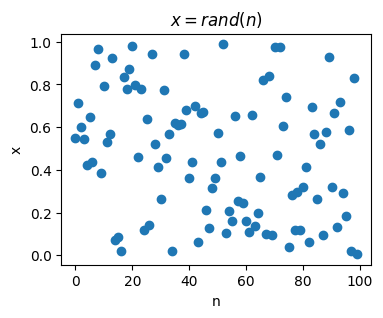

In [4]:
plt.scatter(range(len(x)), x)
plt.xlabel('n')
plt.ylabel('x')
plt.title('$x = rand(n)$')
plt.show();

Since random variable outputs jump around like this we need a different way to visualize them than just thinking of them as points on the number line. The most useful way to visualize random variables is using a **histogram**. To create a histogram, we sample a random variable a whole bunch of times, and plot a count of how many times the variable takes on each given value. We then show these counts in a bar chart with the heights indicating the counts for each value.

In matplotlib we can plot histograms of an array of samples `x` using the function `plt.hist(x)`. Here's an example. I'll sample 100 values from rand and put them in an array `x`, then plot the histogram.

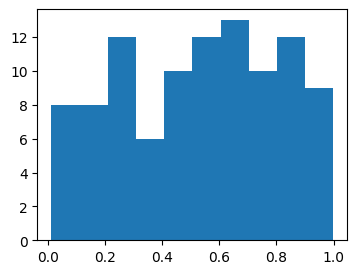

In [5]:
x = np.random.rand(100)
plt.hist(x)
plt.show()

Notice that we just sampled $100$ different values, but we don't see $100$ different bars. That's because histograms don't plot bars for *all values*. First, the values get *binned* into some number of equally spaced **bins**, then the counts that get plotted are the counts of values inside each bin. In this case, the histogram divides the samples into $10$ equally spaced bins. If you look carefully you should see $10$ bars in the plot. We can change the number of bins by passing in a keyword `bins` specifying how many bints to take.

Since I'll be using histograms a lot in this lesson I'm going to write a helper function `plot_histogram` to bundle up the code to plot them nicely. Instead of using `plt.hist`, however, I'll use the seaborn library's `sns.histplot`, which creates much nicer looking histograms. Seaborn is an extension library of matplotlib made specifically for making nicer plots of data. Ignore the `is_discrete` argument for now. I'll use it below.

In [6]:
def plot_histogram(x, is_discrete=False, title='', bins=10, stat='count'):
    if is_discrete:
        sns.histplot(x, bins=bins, discrete=True, stat=stat)
        unique = np.unique(x)
        if len(unique) < 15:
            plt.xticks(unique)
    else:
        sns.histplot(x, bins=bins, stat=stat)
    plt.title(title)
    plt.show()

It's still kind of hard to see if the $100$ rand samples have any kind of pattern in the above histogram plot. Let's now sample 10,000 numbers from rand and see if we can find one.

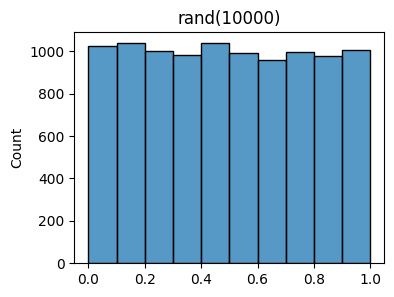

In [7]:
x = np.random.rand(10000)
plot_histogram(x, title=f'rand({10000})', bins=10)

It should be increasingly clear now that what's going on is that rand is sampling numbers between 0 and 1 with equal probability. Each bin should contain roughly $\frac{10000}{10}=1000$ counts, since there are $10000$ samples and $10$ bins. Said differently, the *values* in each bin should have a $\frac{1}{10}=0.1$ probability of being sampled. For example, the values in the left-most bin, call it $\text{bin}_0 = [0, 0.1]$ should have

$$\mathbb{Pr}(x \in \text{bin}_0) = \mathbb{Pr}(0 \leq x \leq 0.1) = 0.1.$$

This type of "flat", equal probability sampling is called **uniform random sampling**.

You may be questioning that it's indeed the case that each bin is truly getting sampled as much as the other bins. After all, the plot still clearly shows their heights vary a bit. Some bins have slightly more values than others do. We can look at how many counts are in the bin using `np.histogram`, which also defaults to $10$ bins. You can see some bins have as many as $1037$ values, some as few as $960$ values.

In [8]:
bin_counts, _ = np.histogram(x)
bin_counts

array([1025, 1036,  999,  981, 1037,  989,  956,  996,  976, 1005])

This variation in the bin counts is really due to the fact that we're only sampling a finite number of values. To get *true* uniform sampling, where all bins have the same counts, we'd have to sample an infinitely large number of times.

Here's a rule of thumb for how much the bin counts should be expected to fluctuate as a function of the sample size. If $N$ is the number of samples, and each bin $k$ contains $N_k$ counts (i.e. its bar height is $N_k$), then you can expect the counts to fluctuate above and below $N_k$ by about

$$\sigma_k = \sqrt{N_k\bigg(1 - \frac{N_k}{N}\bigg)}.$$

Said differently, the counts should be expected to roughly lie in a range $N_k \pm \sigma_k$. This notation means the same thing as saying the counts should roughly speaking lie in the range $[N_k - \sigma_k, N_k + \sigma_k]$. By "roughly", I mean sometimes bins can have counts outside this range, but it's uncommon.

In the above example, there are $N=10000$ samples, and each bin has about $N_k=1000$ counts, so you should expect the counts to fluctuate by about

$$\sigma_k = \sqrt{1000\bigg(1 - \frac{1000}{10000}\bigg)} = 30,$$

which means the counts should rougly lie in the range $1000 \pm 30$. This seems to be in line with what we're seeing experimentally. Notice as the sample size $N \rightarrow \infty$, the fluctuations $\sigma_k \rightarrow 0$. We'll see where this rule comes from later (hint: the binomial distribution).

Back to random variables. Broadly speaking we can divide random variables into two classes of distributions:
- discrete distributions: random variables that can only take on a discrete set of values.
- continuous distributions: random variables that can take on any continuum of real values.

I'll start by talking about the discrete case since it's easier to understand.

## Discrete Probability

Discrete random variables are variables that can only take on a discrete range of values. Usually this range is a finite set like $\{0,1\}$ or $\{1,2,3,4,5,6\}$ or something like that. But they could have an infinite range too, for example the set $\mathbb{N}$ of all non-negative integers. Rand is not an example of a discrete random variable, since there the range is all of the interval $[0,1]$.

Here are some examples of real life things that can be modeled by a discrete random variable:
- Modeling the rolls of a die with faces $1,2,3,4,5,6$.
- Modeling values from flipping a coin taking on a value of heads or tails.
- Modeling a hand of poker, where there are 5 cards each drawn from the same deck of 52 cards.
- Modeling the outputs of data used to train a machine learning classification model.
- Modeling the number of heads gotten from flipping a coin a whole bunch of times.
- Modeling the number of people entering a building per hour.

### Motivation: Rolling a Die

Consider a very simple toy problem: rolling a die (singular of dice). If you've never seen dice before, they're white cubes with black dots on each face of the cube. Each face gets some number of black dots on it between 1 and 6. People like to "roll" these dice in games by shaking and tossing them onto the ground. The person with the highest score, i.e. the sum of the number of dots facing upward, wins that round.

<br><br><center><span style="font-size: 80px;">&#127922;</span></center><br>

Let's think a little bit about a single die. Suppose I want to roll a single die. Having not thrown the die yet, what should I "expect" my score to be? Call this score $x$. The possible scores I can have are just the number of dots on each face of the die, i.e. $1,2,3,4,5,6$. This alone doesn't tell me what the chance is that any given $x$ turns up in a roll. We need some other information.

Perhaps your common sense kicks in and you think, "Well clearly each number has an equal chance of showing up if you roll the die". This is called the **principle of indifference**. In practice you'd usually be right. You're saying that, since we don't have any other information to go on, each number should have an equal chance of showing up on each roll. That is, on any given roll, the random variable $x$ should take on each value $k=1,2,\cdots,6$ with probability,

$$\mathbb{Pr}(x=k) = \frac{1}{6}.$$

Denote these probabilities as $p_k$ for short, so $p_k = \mathbb{Pr}(x=k)$. Observe,
1. Each probability is non-negative, $p_k = \frac{1}{6} \geq 0$,
2. The sum of all probabilities is one, $\sum_{k=0}^5 p_k = 6 \cdot \frac{1}{6} = 1$.

These two properties are the defining characteristics of a probability. After all, we *defined* probability as a function $0 \leq \mathbb{Pr}(x=k) \leq 1$. The second condition is just a mathematical way of saying that rolling the die must return *some* value between $1$ and $6$. It can't just make up some new value, or refuse to answer.

Anyway, suppose I rolled the die $36$ times and got the following values:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 3 | 4 | 5 | 4 | 3 | 1 | 3 | 6 | 5 | 2 | 1 | 5 | 4 | 2 | 1 | 1 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 3 | 3 | 6 | 6 | 1 | 5 | 4 | 2 | 2 | 4 | 6 | 2 | 4 |

We can make a histogram out of these and check the principle of indifference by verifying the bins are all of about the same height (at least as close to the same as only 30 rolls will allow). Note that I'm now using `is_discrete=True` here, which tells the helper function to give each unique $k$ its own bin.

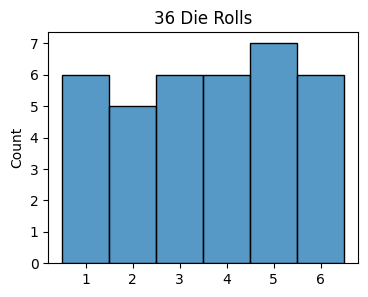

In [9]:
x = [3, 4, 5, 4, 3, 1, 3, 6, 5, 2, 1, 5, 4, 2, 1, 1, 1, 6, 5, 6, 3, 5, 5, 3, 3, 6, 6, 1, 5, 4, 2, 2, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls')

Given the fact that I only rolled $36$ times, this histogram looks very uniform, giving a pretty strong hint that each value has an equal probability of being rolled. Since most bars have height $6$, they correspond to probabilities of $\frac{6}{36}=\frac{1}{6}$, which is what our common sense expected. Note the counts can fluctuate in this case in a range of about $6 \pm 2$. This is an example of a *fair die*.

What if our common sense was incorrect? What if I rolled the die a bunch of times and found out some numbers occurred a lot more often than others? This would happen if the die were weighted unevenly, or *loaded*. In this case we're left to assign some *weight* $N$ to each number $k$.

To determine what the right weights should be empirically, probably the easiest way would again be to roll the die a bunch of times and count how many times each value $k$ occurs. Those counts will be your weights $N_k$. These are just the heights of each bin in the histogram. To turn them into probabilities $p_k$, divide by the total number of rolls, call it $N$. The probabilities would then be given approximately by

$$p_k = \mathbb{Pr}(x=k) \approx \frac{N_k}{N}.$$

As $N \rightarrow \infty$ this equality goes from approximate to exact. Another way of saying this is that we could *define* the probability $\mathbb{Pr}(x=k)$ as the limit

$$\mathbb{Pr}(x=k) = \lim_{N \rightarrow \infty} \frac{N_k}{N}.$$

This is an alternate way of defining a probability, different from the "degree of belief" approach I used above. This is usually called the **frequentist** or objective approach. In this approach, probability is the frequency of the number of times an outcome occurs in an experiment, i.e. $\frac{N_k}{N}$. In contrast, the "degree of belief" perspective is called the **Bayesian** or subjective approach. Both approaches have their uses, so we'll go back and forth between the two as it suits us.

To test if your die is loaded, what you can do is roll the die $N$ trials and calculate the probabilities. If they're all roughly equal to $1/6$ like the example above then the die is fair. Otherwise it's loaded. Suppose when I'd rolled the die I'd instead gotten the following outcomes:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 4 | 4 | 5 | 4 | 3 | 5 | 3 | 6 | 5 | 6 | 1 | 5 | 4 | 5 | 6 | 5 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 4 | 3 | 6 | 6 | 4 | 5 | 4 | 2 | 5 | 4 | 6 | 2 | 4 |

Let's plot the histogram of these outcomes and compare to the fair die case.

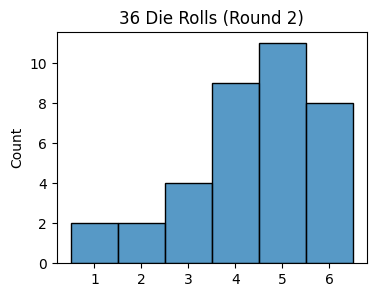

In [10]:
x = [4, 4, 5, 4, 3, 5, 3, 6, 5, 6, 1, 5, 4, 5, 6, 5, 1, 6, 5, 6, 3, 5, 5, 4, 3, 6, 6, 4, 5, 4, 2, 5, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls (Round 2)')

Notice how now the outcomes are skewed towards higher values. This clearly doesn't look uniform anymore since most of the counts aren't in the expected range of $6 \pm 2$. The die has been "loaded to roll high". 

Using the frequentist approach we can estimate what the probability of rolling each value is. To do that, we can get each of the bin counts and divide them all by $n=36$. The probabilities are given below. Notice they sum to one, like you'd expect.

In [11]:
counts, _ = np.histogram(x, bins=6)
N = len(x)
p = counts / N
[f"Pr(x={i+1}) = {round(p[i], 3)}" for i in range(len(p))]

['Pr(x=1) = 0.056',
 'Pr(x=2) = 0.056',
 'Pr(x=3) = 0.111',
 'Pr(x=4) = 0.25',
 'Pr(x=5) = 0.306',
 'Pr(x=6) = 0.222']

### General Case

Of course, there's nothing special about a die. We can define probabilities in exactly the same way for any discrete random variable. A random variable $x$ is called **discrete** if it can take on one of $n$ countable values $x_0,x_1,\cdots,x_{n-1}$. Suppose we run an experiment $n$ times and observe the outcomes of $x$ at each trial. If $x=x_k$ for some number of counts $n_j$, then the probability $x=x_k$ is given by the limit of running the experiment infinitely many times,

$$p_k = \mathbb{Pr}(x=k) = \lim_{N \rightarrow \infty} \frac{N_k}{N}.$$

The set of values that $x$ can take on are called the **support** of the random variable. For values outside the support, it's assumed the probability is zero. As will always be true with probabilities, it's still the case that each probability must be non-negative, and they must all sum to one,

$$p_k \geq 0, \quad \sum_{k=0}^{n-1} p_k = 1.$$

While we have an experimental way to calculate probabilities now, it would be useful to define probabilities as functions of random variables so we can study them mathematically. These functions are called **probability distributions**. Suppose the probabilities $p_k$ are given by some function $p(x)$ mapping outcomes to probabilities. When this is true, we say $x$ is distributed as $p(x)$, written in short-hand as $x \sim p(x)$. If $x$ is discrete, we call the function $p(x)$ a **probability mass function**, or **PMF** for short.

In the simple case of the fair die, since each $p_k = \frac{1}{6}$, its PMF is just the simple constant function $p(x) = \frac{1}{6}$. This distribution is an example of the **discrete uniform distribution**. If $x$ is a discrete random variable taking on one of $k$ outcomes, and $x$ is distributed as discrete uniform, then its probabilities are given by $p_k = \frac{1}{n}$ for all $k$. In histogram language, all bins have approximately the same number of counts.

In the less simple case of the loaded die we had to estimate each probability empirically. Supposing we could calculate those probabilities exactly, the PMF for that particular loaded die would look like

$$
p(x) = 
\begin{cases}
0.056, & x = 1, \\
0.056, & x = 2, \\
0.111, & x = 3, \\
0.250, & x = 4, \\
0.306, & x = 5, \\
0.220, & x = 6.
\end{cases}
$$

This is an example of a **categorical distribution**. Their histograms can look completely arbitrary. Each bin can contain as many counts as it likes. All that matters is that $k$ is finite and all the probabilities sum to one. Any time you take a discrete uniform random variable and weigh the outcomes (e.g. by loading a die) you'll create a categorical distribution.

Typically each distribution will have one or more parameters $\theta$ that can be adjusted to change the shape or support of the distribution. Instead of writing $p(x)$ for the PMF, when we want to be explicit about the parameters we'll sometimes write $p(x; \theta)$. The semi-colon is used to say that any arguments listed after it are understood to be parameters, not function inputs. In this notation, parameters of a distribution are assumed to be known, non-random values. We'll relax this requirement below, but assume parameters are non-random for now.

For example, the discrete uniform distribution has two parameters indicating the lowest and highest values in the support, called $a$ and $b$. We could thus express its PMF as $p(x;a,b)$, which means "the probability of $x$ given *known* parameters $a$ and $b$".

Using these parameters, it's also common to use special symbols as a short-hand for common distributions. For example, the discrete uniform distribution with parameters $a$ and $b$ is often shortened to something like $DU(a,b)$. If we want to say $x$ is a discrete uniform random variable, we'd write $x \sim DU(a,b)$. You'll also sometimes see people use the symbol to write the PMF as well, for example $DU(x;a,b)$.

### Discrete Distributions

Some discrete probability distributions occur so frequently that they get a special name. Each one tends to occur when modeling certain kinds of phenomena. Here are a few of the most common discrete distributions. I'll just state them and summarize their properties for future reference.

#### Discrete Uniform Distribution
- Symbol: $DU(a,b)$
- Parameters: Integers $a, b$, where $a$ is the minimum and $b-1$ is the maximum value in the support
- Support: $x=a,a+1,\cdots,b-1$
- Probability mass function: $$p(x; a,b) = \frac{1}{b-a}, \ \text{ for } x = a, a+1, \cdots, b-1.$$
- Cumulative distribution function: 
$$
P(x; a,b) = 
\begin{cases}
0 & x < a, \\
\frac{\text{int}(x) - a}{b-a}, & a \leq x \leq b, \\
1 & x \geq 1.
\end{cases}
$$
- Random number generator: `np.random.randint(a, b)`
- Notes:
    - Used to model discrete processes that occur with equal weight, or are suspected to (the principle of indifference)
    - Example: The fair die, taking $a=1, b=7$ gives $x \sim D(1,7)$ with $p(x) = \frac{1}{7-1} = \frac{1}{6}$

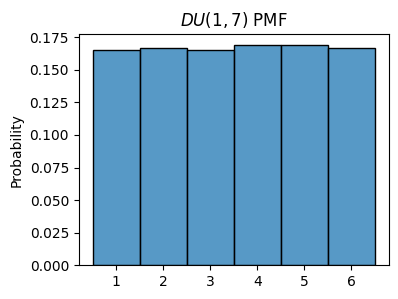

In [12]:
a = 1
b = 7
x = np.random.randint(a, b, size=100000)
plot_histogram(x, is_discrete=True, title=f'$DU({a},{b})$ PMF', stat='probability')

#### Bernoulli Distribution

- Symbol: $\text{Ber}(\text{p})$
- Parameters: The probability of success $0 \leq \text{p} \leq 1$
- Support: $x=0,1$
- Probability mass function:
$$
p(x; \text{p}) = \text{p}^x (1-\text{p})^{1-x} = 
\begin{cases}
1-\text{p} & x = 0, \\
\text{p} & x = 1.
\end{cases}
$$
- Cumulative distribution function:
$$
P(x; \text{p}) = 
\begin{cases} 
0 & \text{if } x < 0 \\
1-p & \text{if } 0 \leq x < 1 \\
1 & \text{if } x \geq 1.
\end{cases}.
$$
- Random number generator: `np.random.choice([0, 1], p=[1 - p, p])`
- Notes:
    - Used to model binary processes where the probability of success can be estimated
    - Example: Flipping a fair coin, where $\text{tails} = 0$, $\text{heads} = 1$, and $\text{p}=\frac{1}{2}$
    - Used for binary classification. Given an input $\mathbf{x}$ with some binary output $y=0,1$. If $\text{p}=\hat y$, then $y \sim \text{Ber}(\hat y)$.
    - Special case of the binomial distribution where $n=1$: $\text{Ber}(\text{p}) = \text{Bin}(1, \text{p})$.

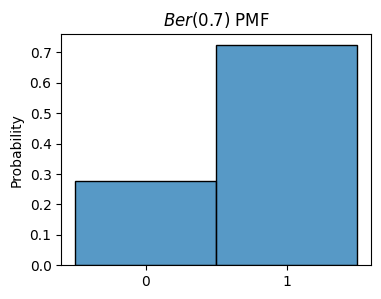

In [13]:
p = 0.7
x = np.random.choice([0, 1], p=[1 - p, p], size=1000)
plot_histogram(x, is_discrete=True, title=f'$Ber({p})$ PMF', stat='probability')

#### Categorical Distribution

- Symbol: $\text{Cat}(p_0,p_1,\cdots,p_{k-1})$ or $\text{Cat}(\mathbf{p})$
- Parameters: $k$ non-negative real numbers $p_j$ that sum to one, each representing the probability of getting $x_j$
    - Commonly written as a vector $\mathbf{p} = (p_0,p_1,\cdots,p_{k-1})$
- Support: $x = 0, 1, \cdots, k-1$
- Probability mass function:
$$
p(x; \mathbf{p}) = \begin{cases}
p_0 & x = 0, \\
p_1 & x = 1, \\
\vdots & \vdots \\
p_{k-1} & x = k-1.
\end{cases}
$$
- Cumulative distribution function:
$$
P(x; \mathbf{p}) = 
\begin{cases}
0 & \text{if } x \leq x_0 \\
p_0 & \text{if } x_0 \leq x \leq x_1 \\
p_0 + p_1 & \text{if } x_1 \leq x \leq x_2 \\
p_0 + p_1 + p_2 & \text{if } x_2 \leq x \leq x_3 \\
\vdots & \vdots \\
1 & \text{if } x \geq x_{n-1}.
\end{cases}
$$

- Random number generator: `np.random.choice(np.arange(k), p=p)`
- Notes:
    - Used to model categorical processes where a finite number of classes can occur with arbitrary probabilities
    - Used for multiclass classification. Given an input $\mathbf{x}$ with outputs in one of $k$ classes $y=0,1,\cdots,k-1$. If $\mathbf{p}=\mathbf{\hat y}$, then $\mathbf{y} \sim \text{Cat}(\mathbf{\hat y})$.
    - Generalization of the Bernoulli distribution, allowing for $k$ distinct outcomes instead of just $2$.
    - Models the values rolled from a die when $k=6$.

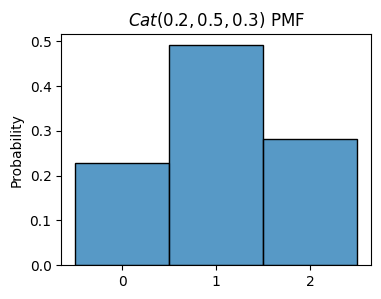

In [14]:
p = [0.2, 0.5, 0.3]
x = np.random.choice(np.arange(len(p)), p=p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$Cat{tuple(p)}$ PMF', stat='probability')

#### Binomial Distribution

- Symbol: $\text{Bin}(n, \text{p})$
- Parameters: The number of trials $n=1,2,3,\cdots$ and probability $0 \leq \text{p} \leq 1$ of success of each trial
- Support: $x = 0, 1, \cdots, n$
- Probability mass function:
$$p(x; n,\text{p}) = \binom{n}{x} \text{p}^{x} (1-\text{p})^{n-x}, \ \text{for} \ x=0,1,\cdots,n, \ \text{where} \ \binom{n}{x} = \frac{n!}{x!(n-x)!}.$$
- Cumulative distribution function: $$P(x; n,\text{p}) = \sum_{k=0}^{\text{int}(x)} {n \choose k} p^k(1-p)^{n-k}.$$
- Random number generator: `np.random.binomial(n, p)`
- Notes:
    - Used to model the number of successes from $n$ independent binary processes (analogous to coin flips)
    - Example: Flipping a fair coin $n$ times and counting the number of heads
    - Generalization of the Bernoulli distribution. The sum of $n$ independent Bernoulli variables is $\text{Bin}(n, \text{p})$.
    - The number of counts in each bin of a histogram of independent samples can be modeled as a binomial random variable

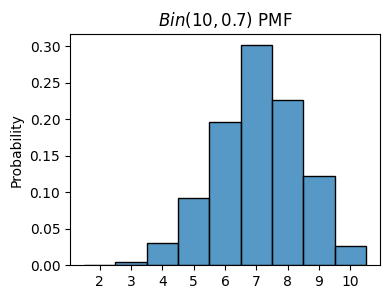

In [15]:
n = 10
p = 0.7
x = np.random.binomial(n, p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$Bin{(n,p)}$ PMF', stat='probability')

#### Poisson Distribution

- Symbol: $\text{Poisson}(\lambda)$
- Parameters: A rate parameter $\lambda \geq 0$
- Support: $x = 0, 1, 2, 3, \cdots$
- Probability mass function:
$$p(x; \lambda) = \frac{\lambda^x e^{-\lambda}}{x!}, \quad \text{for} \ x=0,1,2,3,\cdots.$$
- Cumulative distribution function:
$$P(x; \lambda) = e^{-\lambda}\sum_{k=0}^{\text{int}(x)}\frac{\lambda^k}{k!}.$$
- Random number generator: `np.random.poisson(lambda)`
- Notes:
    - Used to model counting processes, like the number of calls coming into a call center, or the number of times a Geiger counter registers a click
    - Example: The number of people walking through the door of a coffee shop per hour can be modeled as a Poisson distribution

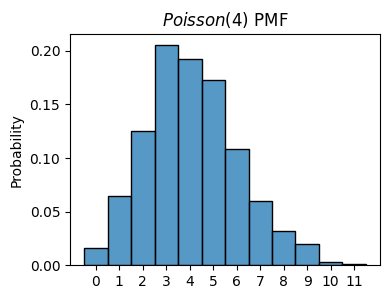

In [16]:
lambda_ = 4
x = np.random.poisson(lambda_, size=1000)
plot_histogram(x, is_discrete=True, title=f'$Poisson({lambda_})$ PMF', stat='probability')

### Probabilities of Multiple Outcomes

We've seen how to calculate the probabilities of any one outcome. The probability that $x=k$ is given by $\text{Pr}(x=k) = p(k)$, where $p(k)$ is the PMF. It's natural to then ask how we can think about probabilities of multiple outcomes. For example, consider again the situation of rolling a fair die. Suppose we were interested in knowing what the probability was of rolling an even number, i.e. $x=2,4,6$. How would we approach this? Your intuition suggests the right idea. We can just sum the probabilities of each outcome together,

$$\mathbb{Pr}(x\text{ is even}) = \mathbb{Pr}(x=2,4,6) = p(2) + p(4) + p(6) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{1}{2}.$$

This same idea extends to any discrete set. Suppose we're interested in the probability that some discrete random variable $x$ takes on values in some set $E = \{x_0, x_1, \cdots, x_{m-1}\}$. Then all we need to do is some over the probabilities of all the outcomes in $E$, i.e.

$$\mathbb{Pr}(x \in E) = \sum_{k \in E} p(k) = \sum_{i=0}^{m-1} p(x_i) = p(x_0) + p(x_1) + \cdots p(x_{m-1}).$$

When the set of interest is the entire support of $x$, the right-hand side is just the sum the probability of all possible outcome, which is just one. Thus, we'll always have $0 \leq \mathbb{Pr}(x \in E) \leq 1$ for any set $E$.

Though we don't really have to for discrete variables, it's conventional to define another function $P(x)$ called the **cumulative distribution function**, or **CDF**. It's the probability $x \in (-\infty, x_0]$ for some fixed value $x_0 \in \mathbb{R}$,

$$P(x_0) = \mathbb{Pr}(x \leq x_0) = \sum_{k \leq x_0} p(k) = \sum_{k=-\infty}^{\text{int}(x_0)} p(k),$$

where it's understood that $p(k)=0$ whenever $k$ isn't in the support of $x$. Note the CDF is a real-valued function. We can ask about $P(x_0)$ for *any* $x_0 \in \mathbb{R}$, not just discrete values of $x_0$.

But why should we care? It turns out if we know the CDF in some simple form, we can use it to calculate the probability $x$ is in any other interval by differencing the CDF at the endpoints. Suppose we're interested in the probability $a \leq x \leq b$. If we know the CDF for a particular distribution in some simple form, we can just difference it to get the probability of being in the interval, i.e.

$$\mathbb{Pr}(a \leq x \leq b) = \mathbb{Pr}(x \leq b) - \mathbb{Pr}(x \leq a) = P(b) - P(a).$$

This fact is more useful for continuous distributions than discrete ones, since in the discrete case we can always just sum over the values, which is usually pretty quick to do.

#### Getting a Job

Here's a useful application where probabilities of multiple outcomes can sometimes come in handy. Suppose you're applying to a bunch of jobs, and you want to know what is the probability that you'll get *at least one* offer. Suppose you've applied to $n$ jobs. For simplicity, assume each job has roughly the same probability $\text{p}$ of giving you an offer. Then each job application looks kind of like the situation of flipping a coin. If $x_i=1$ you get an offer, if $x_i=0$ you get rejected. We can thus think of each job application as a Bernoulli random variable $x_i \sim \text{Ber}(\text{p})$. 

Now, assume that the job applications are all independent of each other, so one company's decision whether to give you an offer doesn't affect another company's decision to give you an offer. This isn't perfectly true, but it's reasonably true. In this scenario, the *total* number of offers $x$ you get out of $n$ job applications will then be binomially distributed, $x \sim \text{Bin}(n, \text{p})$. 

We can use this fact to answer the question we started out with: What is the probability that you receive at least one offer? It's equivalent to asking, if $x$ is binomial, what is the probability that $x \geq 1$? Now, since $x$ is only supported on non-negative values, we have

$$
\begin{align*}
\mathbb{Pr}(x \geq 1) &= \mathbb{Pr}(x \geq 0) - \mathbb{Pr}(x=0) \\
&= 1 - \mathbb{Pr}(x=0) \\
&= 1 - p(0;n,\text{p}) \\
&= 1 - \binom{n}{0} \text{p}^0 (1-\text{p})^{n-0} \\
&= 1 - \frac{n!}{0!(n-0)!} (1-\text{p})^n \\
&= 1 - (1-\text{p})^n.
\end{align*}
$$

We thus have a formula. The probability of receiving at least one job offer from applying to $n$ jobs, assuming each gives an offer with probability $\text{p}$, and applications are independent of each other, is

$$\mathbb{Pr}(\text{at least one offer}) = 1 - (1-\text{p})^n.$$

Here's an example of how this formula can be useful. Suppose you believe you have a 10% chance of getting an offer from any one company you apply to, so $\text{p}=0.1$. If you apply to $n=10$ jobs, you'll have about a 34.86% chance of receiving at least one offer.

In [17]:
p = 0.1
n = 10
prob_offer = 1 - (1 - p) ** n
prob_offer

0.6513215599

Let's now ask how many jobs you'd have to apply to to give yourself at least a 90% chance of getting at least one job offer? Here's what you can do. Let $O = \mathbb{Pr}(\text{at least one offer})$, so $O = (1-p)^n$. Set $O=0.9$ and solve for $n$. Then you'd have

$$
\begin{align*}
O &= 1 - (1-p)^n \\
(1-p)^n &= 1 - O \\
n \log(1-p) &= \log(1 - O) \\
n &= \frac{\log(1 - O)}{\log(1 - p)}.
\end{align*}
$$

Plugging in $p=0.1$ and $O=0.9$ gives $n \approx 21.85$. Thus, you'd need to apply to at least $n=22$ jobs to have a decent chance of getting at least one offer. Here's a plot of this idea. Each curve is a plot of $n=n(p)$ for different choices of $O$, in this case, 50%, 75%, 90%, and 99%.

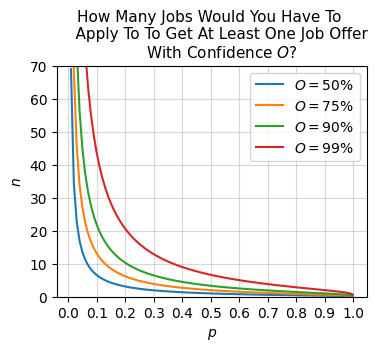

In [18]:
p = np.linspace(0.01, 0.999, 100)
O = [0.5, 0.75, 0.9, 0.99]
for o in O:
    n = np.log(1 - o) / np.log(1 - p)
    plt.plot(p, n, label=f'$O={round(o*100)}$%')
plt.xticks(0.1 * np.arange(11))
plt.ylim(0, 70)
plt.title(
    """How many jobs would you have to 
    apply to to get at least one job offer
    with confidence $O$?""".title(), fontsize=11)
plt.xlabel('$p$')
plt.ylabel('$n$')
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

The moral of this story is that you have two ways to up your chances of getting a job offer: Up your chances of getting any one job (i.e. increase $p$), or apply to a lot more jobs (i.e. increase $n$). The more confident you want to be of getting an offer (i.e. $O$), the more jobs you'll need to apply to. This same idea can be used to model the probability of at least one occurrence for any binary event similar to this.

## Continuous Probability

So far we've covered discrete random variables, ones that take on a finite (or countably infinite) set of values. We can also consider random variables that take on a continuous range of values. For example, a continuous random variable $x$ can take on values in the entire interval $[0,1]$, or the whole real line $\mathbb{R} = (-\infty, \infty)$. The key difference between continuous variables and discrete variables is that we have to think in terms of calculus now. Instead of points we'll have infinitesimal areas. Instead of sums we'll have integrals.

It may not be obvious to you that there are practical examples where continuous random variables would be useful. Here are some examples:
- Modeling the behavior of random number generators like rand.
- Modeling the total sales a business will do next quarter.
- Modeling the time it takes for a customer to complete a purchase in an online store.
- Modeling the amount of fuel consumed by a vehicle on a given day.
- Modeling the height of waves in the ocean at a given time.
- Modeling the length of a stay in a hospital by a typical patient.
- Modeling the amount of rainfall in a specific region over a period of time.
- Modeling the measured voltage of a car battery at any point in time.

In fact, any continuous variable you can think of could be treated as random depending on the situation. Even if a variable is completely deterministic, there may be situations where it's helpful to think of it as random. The whole idea of *Monte Carlo methods* is based on this idea, in fact.

### Motivation: Rand

I showed example of a continuous random variable already at the beginning of this lesson, when I introduced the idea of random number generators like rand. Rand is an example of a function that can (approximately) generate samples of a continuous random variable. In particular, it samples uniformly from the interval $[0,1]$. I already showed what its histogram looks like for a large number of samples. Here it is again.

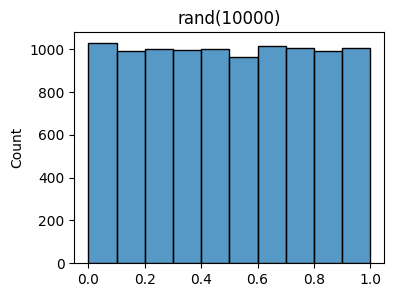

In [19]:
x = np.random.rand(10000)
plot_histogram(x, title=f'rand({10000})', bins=10)

Let's now try to figure out how we should define the probability of values sampled from rand. In the discrete case, we were able to define probabilities by running an experiment (e.g. rolling a die a bunch of times). We could look at the ratio of the number of times $N_k$ an outcome $k$ occurred over the number of total trials $N$. This made sense in the discrete case since we could reasonably well rely on each outcome $x=k$ occurring enough times to get a meaningful count.

This approach doesn't work well for continuous random variables. Suppose $x$ is the random variable resulting from rand, uniform on the interval $[0,1]$. If I sample a single value from rand, there's no reason to assume I'll ever see that *exact* value again. There are uncountably infinitely many values to choose from in $[0,1]$, so I'm pretty much guaranteed to never see the same value twice. Instead of counting how many times each value occurs, what I can do is use the binning trick we saw with histograms. For example, I can divide $[0,1]$ up into ten subintervals (or bins)

$$I_0=[0,0.1], \quad I_1=[0.1,0.2], \quad I_3=[0.2,0.3], \quad \cdots, \quad I_9=[0.9,1].$$

If I sample one value from rand it's guaranteed to be in one of these subintervals $I_k$. If I sample a whole bunch of values from rand, say $N=1000$, I should expect each $I_k$ to contain about $N_k=100$ counts (10% of the total since there are 10 bins). It thus seems to make perfect sense to define a probability on each $I_k$,

$$\mathbb{Pr}(x \in I_k) = \frac{N_k}{N} = \frac{100}{1000} = \frac{1}{10} = 0.1.$$

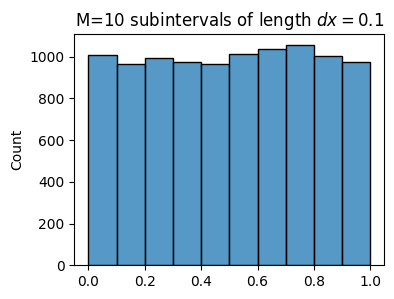

In [20]:
N = 10000
M = 10
dx = 1 / M
x = np.random.rand(N)
plot_histogram(x, title=f'M=${M}$ subintervals of length $dx={dx}$', bins=M)

We still want to approximate the discrete idea of having a probability $\mathbb{Pr}(x=k)$. How can we do it using this idea of subintervals? Enter calculus. What we can imagine doing is allowing each subinterval $I_k$ to become infinitesimally small. Suppose we subdivide $[0,1]$ into $M$ total subintervals each of infinitesimal length $dx$, satisfying $M=\frac{1}{dx}$, i.e.

$$I_0=[0,dx], \quad I_1=[dx, 2dx], \quad I_2=[2dx, 3dx], \quad \cdots, \quad I_{M-1}=[(M-1)dx, 1].$$

Suppose $x_0$ is some point in one of these tiny intervals $I_k=[kdx, (k+1)dx]$. Since each $I_k$ is a *very* tiny interval, the probability that $x \approx x_0$ is pretty much exactly the same thing as the probability that $x \in I_k$. Let's thus *define* the probability that $x \approx x_0$ as the probability that $x \in I_k$,

$$\mathbb{Pr}(x \approx x_0) = \mathbb{Pr}(x \in I_k) = \lim_{N \rightarrow \infty} \frac{N_k}{N}.$$

Here's an approximate representation of this idea. I won't be able to make $M=10^{300}$ bins like I'd like, but I can at least make bins so you can see the point. I'll need to generate a huge number of samples $N$ so the histogram will populate. Notice each $N_k \approx \frac{N}{M} = 1000$. That is, 

$$\mathbb{Pr}(x \approx x_0) \approx \frac{N_k}{N} \approx \frac{N/M}{N} = \frac{1}{M} = dx.$$ 

Evidently, the probability $x \approx x_0$ is infinitesimal, so very very tiny. This is why you'll basically never sample the same value twice.

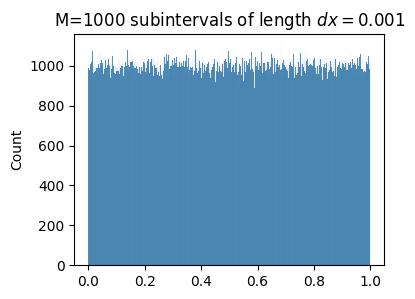

In [21]:
N = 1000000
M = N // 1000
dx = 1 / M
x = np.random.rand(N)
plot_histogram(x, title=f'M=${M}$ subintervals of length $dx={dx}$', bins=M)

### General Case

The facts I've shown about rand extend to more general continuous random variables as well. Suppose $x$ is defined on some interval $[a,b]$. It could even be infinite. Let's divide this interval up into $M$ tiny sub-intervals of length $dx$, where $M$ must satisfy $M = \frac{b-a}{dx}$,

$$I_0=[a,a+dx], \quad I_1=[a+dx, a+2dx], \quad I_2=[a+2dx, a+3dx], \quad \cdots, \quad I_{M-1}=[a+(M-1)dx, b].$$

Now, run an experiment $N$ times and count how many times outcomes occur, not for each $x$, but for each *subinterval* $I_k=[a+kdx, a+(k+1)dx]$. If $x_0 \in I_k$, that is, if $a+kdx \leq x_0 \leq a+(k+1)dx$, then the probability that $x \approx x_0$ is defined by,
$$\mathbb{Pr}(x \approx x_0) = \mathbb{Pr}(x \in I_k) = \lim_{N \rightarrow \infty} \frac{N_k}{N}.$$

Just as with the uniform case before, it's useful to think of the probability $\mathbb{Pr}(x \approx  x_0)$ as explicitly being proportional to the subinterval length $dx$. In the uniform case it was just $\mathbb{Pr}(x \approx  x_0)=dx$ exactly. In the more general case, $\mathbb{Pr}(x \approx  x_0)$ may depend on the value of $x_0$, so we need to weight the right-hand side by some non-negative weighting function $p(x) \geq 0$, so

$$\mathbb{Pr}(x \approx  x_0) = \mathbb{Pr}(x \in I_k) = p(x_0)dx.$$

This weighting function $p(x)$ is called the **probability density function**, or **PDF** for short. It's the continuous analogue of the probability mass function from the discrete case (hence why I use the same notation). Unlike the discrete PMF, the PDF is *not* a probability all by itself. It's a probability per infinitesimal unit $dx$. That is, it's a *density*. For this reason, the PDF need not sum to one. It only needs to be non-negative, i.e. all outputs $p(x_0)$ should lie on or above the x-axis, never below it. But any one output $p(x_0)$ can be arbitrarily large, even $\infty$!

What *must* be true is that all probabilities sum to one. Since each $\mathbb{Pr}(x \approx  x_0)$ is infinitesimal now, this means all probablities must *integrate* to one over the support of $x$. If $x$ is supported on $[a,b]$, then

$$\mathbb{Pr}(a \leq x \leq b) = \sum_{k=0}^{M-1} \mathbb{Pr}(x \in I_k) = \int_a^b p(x)dx = 1.$$

This means we can think of a PDF as being any non-negative function that integrates to one. In fact, *any* function that satisfies this property is a valid PDF for *some* continuous random variable.

Specifying the functional form of the PDF $p(x)$ creates a **continuous probability distribution**. By specifying $p(x)$, we've uniquely specified what the probabilities have to be for the variable $x$. In the next section I'll define some of the most common continuous distributions.

Just as with discrete probabilities, we can get the probability that $x$ is in any set by summing over all the values in that set. The only difference is we replace the sum with an integral over the set. For example, the probability that $c \leq x \leq d$ is given by

$$\mathbb{Pr}(c \leq x \leq d) = \int_c^d p(x)dx.$$

We can also define a cumulative distribution function $P(x)$ for continuous probabilities in exactly the same way, except again replacing sums with integrals,

$$P(x_0) = \mathbb{Pr}(x \leq x_0) = \int_{-\infty}^{x_0} p(x')dx',$$

where it's understood that $p(x')=0$ whenever $x'$ is outside the support of $x$.

If we can obtain the CDF for a distribution, we can calculate the probability $x$ is in any set without having to evaluate an integral. For example, if the set is again the interval $[c,d]$, then

$$\mathbb{Pr}(c \leq x \leq d) = P(d) - P(a).$$

This is just a restatement the rule for definite integrals I covered in the calculus lesson, if $f(x)=\frac{d}{dx}F(x)$, then

$$\int_c^d f(x) dx = F(d) - F(c).$$

To show a brief example, I'll calculate the CDF of the rand distribution shown already, where $x$ is uniform on $[0,1]$. I already showed that its PDF is just $p(x)=1$ for all $0 \leq x \leq 1$. Outside this interval $p(x)=0$ everywhere. Using the PDF I can calculate the CDF by integrating. There are three cases to consider. If $x < 0$, the CDF will just be $P(x)=0$ since $p(x)=0$. If $x > 1$, $P(x) = 1$ since we're integrating over the whole support $[0,1]$. Otherwise, we're integrating over some subinterval $[0,x]$, in which case $P(x)=x$. That is,

$$
P(x) = \int_{-\infty}^x p(x') dx' = \int_{-\infty}^0 0 dx' + \int_0^x 1 dx' = 0 + x' \bigg |_{x'=0}^{x'=x} = 
\begin{cases}
0, & x < 0 \\
x, & 0 \leq x \leq 1 \\
1, & x > 1.
\end{cases}$$

Here's a plot of both the PDF and CDF of a rand random variable. Notice the PDF is just the constant $p(x)=1$ on $[0,1]$, whose area under the curve is just one, since the total probability must integrate to one. Also, notice how this same area is the exact same thing that the histogram tries to approximate. In fact, a histogram is just a discrete approximation to the area under a continuous PDF.

For the CDF, notice how the function starts at $P(x)=0$ on the far left, and ramps up monotonically to $P(x)=1$ as $x$ increases. Every CDF will have this property. The only difference is what the ramp looks like. It'll always be the case that $P(-\infty)=0$, $P(\infty)=1$, and some monotonic increasing curve connects these two extremes.

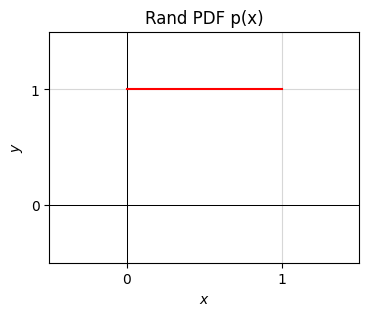

In [22]:
x = np.linspace(0, 1, 100)
p = lambda x: np.ones(len(x))
plot_function(x, p, xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), title='Rand PDF p(x)', show_grid=True)

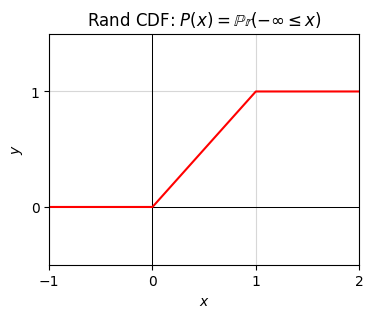

In [23]:
x = np.linspace(-1, 2, 100)
P = lambda x: np.clip(x, 0, 1) # quick way to define the piecewise CDF shown above
plot_function(x, P, xlim=(-1, 2), ylim=(-0.5, 1.5), title='Rand CDF: $P(x)=\mathbb{Pr}(-\infty \leq x)$')

### Continuous Distributions

As with discrete distributions, some continuous distributions occur so frequently that they get a special name. Here are a few of the most common continuous distributions. I'll just state them and summarize their properties for future reference.

#### Uniform Distribution
- Symbol: $U(a,b)$
- Parameters: The minimum $a$ and maximum $b$ values in the support
- Support: $x \in [a,b]$
- Probability density function: $$p(x; a,b) = \frac{1}{b-a}, \ \text{ for } a \leq x \leq b.$$
- Cumulative distribution function:
$$
P(x; a, b) = 
\begin{cases}
0 & x < a, \\
\frac{x - a}{b-a}, & a \leq x \leq b, \\
1 & x \geq 1.
\end{cases}
$$
- Random number generator: `np.random.uniform(a, b)`
- Notes:
    - Used to model continuous processes that occur with equal weight, or are suspected to (the principle of indifference)
    - Example: The values sampled from rand, where $a=0$ and $b=1$, so $x \sim U(0,1)$.
    - The rand example $U(0,1)$ is called the **standard uniform distribution**.

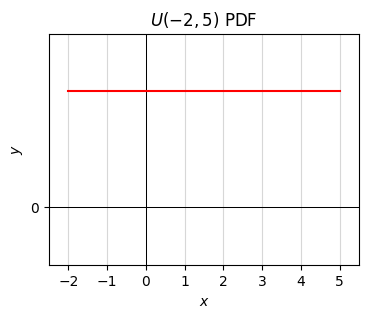

In [24]:
a, b = -2, 5
x = np.linspace(a, b, 1000)
p = lambda x: 1 / (b - a) * np.ones(len(x))
plot_function(x, p, xlim=(a - 0.5, b + 0.5), ylim=(-0.5 / (b - a), 1.5 / (b - a)), 
              title=f'$U({a},{b})$ PDF', show_grid=True)

#### Gaussian Distribution (Normal Distribution)
- Symbol: $\mathcal{N}(\mu, \sigma^2)$
- Parameters: The mean $\mu \in \mathbb{R}$ and variance $\sigma^2 \geq 0$ of the distribution
- Support: $x \in \mathbb{R}$
- Probability density function: $$p(x; \mu , \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x - \mu)^2}{2\sigma^2}\bigg)}.$$
- Cumulative distribution function: $$P(x; \mu , \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \int_{-\infty}^x \exp{\bigg(-\frac{(x' - \mu)^2}{2\sigma^2}\bigg)} dx'.$$
- Random number generator: `np.random.normal(mu, sigma)` (note it `sigma` is the *square root* of the variance $\sigma^2$)
- Notes:
    - Used to model the sum or mean of many continuous random variables, e.g. the distribution of unbiased measurements of some continuous quantity
    - Example: The distribution of heights in a given population of people.
    - Used in machine learning to model the outputs of an L2 regression model. Given a input $\mathbf{x}$ with a continuous output $y$, model $y = f(\mathbf{x}) + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0,\sigma^2)$ is some random error term and $f(\mathbf{x})$ is some deterministic function to be learned. Then $y \sim \mathcal{N}(f(\mathbf{x}),\sigma^2)$.
    - The special case when $\mu=0, \sigma^2=1$ is called the **standard Gaussian distribution**, written $\mathcal{N}(0,1)$. Values sampled from a standard Gaussian are commonly denoted by $z$.
    - Can turn any Gaussian random variable $x$ into a standard Gaussian or vice versa via the transformations $$z = \frac{x-\mu}{\sigma}, \qquad x = \sigma z + \mu.$$
    - The CDF of a Gaussian can't be written in any closed form. The standard Gaussian CDF, usually denoted $\Phi(z)$, is most commonly used since there are functions to calculate it numerically, $$\Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^z \exp{\bigg(-\frac{1}{2}z'^2\bigg)} dz'.$$
    - Use the function `norm.cdf` from `scipy.stats` to get the standard CDF function $\Phi(z)$.

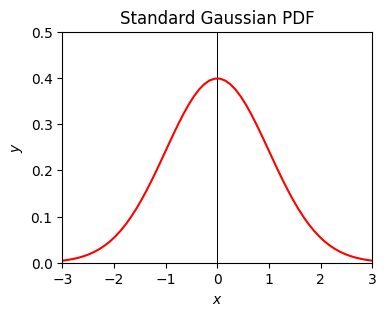

In [25]:
x = np.linspace(-5, 5, 100)
p = lambda x: 1 / np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2)
plot_function(x, p, xlim=(-3, 3), ylim=(0, 0.5), show_grid=False,
              title=f'Standard Gaussian PDF')

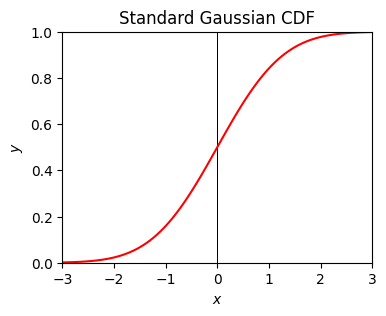

In [26]:
from scipy.stats import norm

x = np.linspace(-3, 3, num=100)
phi = lambda x: norm.cdf(x)

plot_function(x, phi, xlim=(-3, 3), ylim=(0, 1), title='Standard Gaussian CDF', show_grid=False)

#### Laplace Distribution
- Symbol: $\text{Laplace}(\mu, b)$
- Parameters: The mean $\mu \in \mathbb{R}$ and scale $b \geq 0$ of the distribution
- Support: $x \in \mathbb{R}$
- Probability density function: $$p(x; \mu , b) = \frac{1}{2b} \exp\bigg(-\frac{|x-\mu|}{b}\bigg).$$
- Cumulative distribution function: 
$$
P(x; \mu , b) =
\begin{cases}
\frac{1}{2} \exp\bigg(\frac{x-\mu}{b}\bigg), & x \leq \mu \\
1 - \frac{1}{2} \exp\bigg(-\frac{x-\mu}{b}\bigg), & x > \mu.
\end{cases}
$$
- Random number generator: `np.random.laplace(mu, b)`
- Notes:
    - Used to model Gaussian-like situations where outliers are far more likely to occur than in a Gaussian.
    - Example: The distribution of returns in a financial time series, where extreme returns are more likely than expected under a Gaussian distribution.
    - Used in machine learning to model the outputs of an L1 regression model. Given a input $\mathbf{x}$ with a continuous output $y$, model $y = f(\mathbf{x}) + \varepsilon$, where $\varepsilon \sim \text{Laplace}(0, b)$ is some random error term (that can be extreme-valued) and $f(\mathbf{x})$ is some deterministic function to be learned. Then the outputs are also Laplace distributed, with $y \sim \text{Laplace}(f(\mathbf{x}), b)$.
    - The special case when $\mu=0, b=1$ is called the **standard Laplace distribution**, written $\text{Laplace}(0, 1)$.

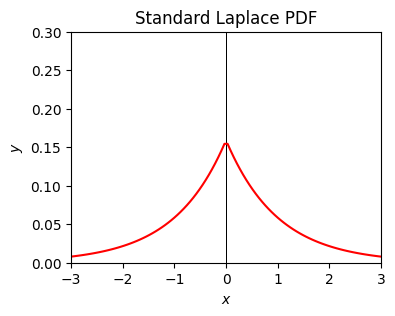

In [27]:
x = np.linspace(-3, 3, 100)
p = lambda x: 1 / (2 * np.pi) * np.exp(-np.abs(x))
plot_function(x, p, xlim=(-3, 3), ylim=(0, 0.3), title='Standard Laplace PDF', show_grid=False)

### Cauchy Distribution
- Symbol: $\text{Cauchy}(m, s)$
- Parameters: The median $m \in \mathbb{R}$ and scale $s > 0$ of the distribution.
- Support: $x \in \mathbb{R}$
- Probability density function: $$p(x; m, s) = \frac{1}{\pi s} \bigg(1 + \bigg(\frac{x-m}{s}\bigg)^2\bigg)^{-1}.$$
- Cumulative distribution function:  $$P(x; m, s) = \frac{1}{\pi} \arctan \bigg(\frac{x-m}{s}\bigg) + \frac{1}{2}.$$
- Random number generator: 
- Notes:
    - Used to model 
    - Example: The distribution of 

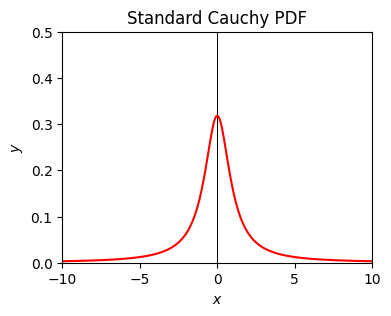

In [28]:
x = np.linspace(-10, 10, 1000)
p = lambda x: 1 / (np.pi) * (1 + x ** 2) ** (-1)
plot_function(x, p, xlim=(-10, 10), ylim=(0, 0.5), title='Standard Cauchy PDF', show_grid=False)

#### Exponential Distribution
- Symbol: $\text{Exp}(\lambda)$
- Parameters: A rate parameter $\lambda > 0$
- Support: $x \in [0,\infty)$
- Probability density function: $$p(x; \lambda) = \lambda e^{-\lambda x}.$$
- Cumulative distribution function: $$P(x; \lambda) = 1 - e^{-\lambda x}.$$
- Random number generator: `np.random.exponential(lambda)`
- Notes:
    - Used to model the time between two independent discrete events, assuming those events occur at a roughly constant rate.
    - Example: The time between earthquakes in a given region, assuming earthquakes are rare and independent events.
    - Frequently used to model the time between two Poisson distributed events. If the events are Poisson distributed and independent, then the time between any two events will be exponentially distributed.

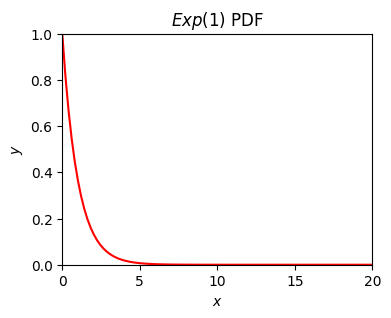

In [29]:
lambda_ = 1
x = np.linspace(0, 20, 100)
p = lambda x: lambda_ * np.exp(-lambda_ * x)
plot_function(x, p, xlim=(0, 20), ylim=(0, 1), show_grid=False,
              title=f'$Exp({lambda_})$ PDF')

#### Gamma Distribution
- Symbol: $\text{Gamma}(\alpha, \beta)$
- Parameters: A shape parameter $\alpha > 0$ and a rate parameter $\beta > 0$
- Support: $x \in [0,\infty)$
- Probability density function: $$p(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}.$$
- Cumulative distribution function:  $$P(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \int_{-\infty}^x t^{\alpha-1} e^{-\beta t} dt.$$
- Random number generator: `np.random.gamma(alpha, 1 / beta)`
- Notes:
    - Used to model 
    - Example: The distribution of 

In [30]:
# x = np.linspace(-3, 3, 100)
# alpha, beta
# p = lambda x: np.math.gamma(1)
# plot_function(x, p, xlim=(0, 10), ylim=(0, 1), title=f'$Gamma({alpha},{beta})$ PDF', show_grid=False)

#### Pareto Distribution
- Symbol: $\text{Pareto}(\alpha, m)$
- Parameters: A shape parameter $\alpha > 0$, and a minimum value $m \in \mathbb{R}$.
- Support: $x \in [m,\infty)$
- Probability density function: $$p(x; \alpha, m) = \alpha m^\alpha x^{\alpha+1}.$$
- Cumulative distribution function:  $$P(x; \alpha, m) = 1 - m^\alpha x^{-\alpha}.$$
- Random number generator: `np.random.pareto(alpha) + m`
- Notes:
    - Used to model 
    - Example: The distribution of 

In [31]:
# derive expected value by starting with simple average and turning it into the right form <x> = sum p(i) x(i)